### <b>■ 파이썬으로 연관규칙 찾기 (Apriori)</b>
    간단한 성능 측정치를 이용해 거대한 db에서 데이터간의 연관성을 찾는 알고리즘
    
#### 예제: 파이썬으로 연관규칙 구현 : 일반 마트

In [1]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

dataset=[['사과','치즈','생수'],['생수','호두','치즈','고등어'],['수박','사과','생수'],['생수','호두','치즈','옥수수']]

# Transaction마다 해당 물건을 구입했으면 True 아니면 False
te = TransactionEncoder() 
te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_) #위에서 나온걸 보기 좋게 데이터프레임으로 변경
df

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True) 
# 최소 지지도 0.5 이상인 연관 규칙을 갖는 제품들을 출력
# use_colnames=True 물건명 출력
print(frequent_itemsets )
print('\n')

from mlxtend.frequent_patterns import association_rules
print( association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) ) 
# 지지도가 0.5 이상인 것을 선별, 그 중 신뢰도가 0.3 이상인 것들만 출력

   support      itemsets
0     0.50          (사과)
1     1.00          (생수)
2     0.75          (치즈)
3     0.50          (호두)
4     0.50      (생수, 사과)
5     0.75      (생수, 치즈)
6     0.50      (호두, 생수)
7     0.50      (호두, 치즈)
8     0.50  (호두, 생수, 치즈)


   antecedents consequents  antecedent support  consequent support  support  \
0         (생수)        (사과)                1.00                0.50     0.50   
1         (사과)        (생수)                0.50                1.00     0.50   
2         (생수)        (치즈)                1.00                0.75     0.75   
3         (치즈)        (생수)                0.75                1.00     0.75   
4         (호두)        (생수)                0.50                1.00     0.50   
5         (생수)        (호두)                1.00                0.50     0.50   
6         (호두)        (치즈)                0.50                0.75     0.50   
7         (치즈)        (호두)                0.75                0.50     0.50   
8     (호두, 생수)        (치즈)           

### ※ 문제252. 다음의 데이터셋에 연관 규칙을 찾으시오

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori

dataset=[['빵','우유'],['맥주','빵','기저귀','계란'],['맥주','콜라','기저귀','우유'],['콜라','빵','기저귀','우유']]

te = TransactionEncoder() 
te_ary = te.fit(dataset).transform(dataset)

df = pd.DataFrame(te_ary, columns=te.columns_)
print(df)
print('\n')

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True) 
print(frequent_itemsets )
print('\n')

from mlxtend.frequent_patterns import association_rules
print( association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3) ) 

      계란    기저귀     맥주      빵     우유     콜라
0  False  False  False   True   True  False
1   True   True   True   True  False  False
2  False   True   True  False   True   True
3  False   True  False   True   True   True


    support       itemsets
0      0.75          (기저귀)
1      0.50           (맥주)
2      0.75            (빵)
3      0.75           (우유)
4      0.50           (콜라)
5      0.50      (맥주, 기저귀)
6      0.50       (빵, 기저귀)
7      0.50      (기저귀, 우유)
8      0.50      (기저귀, 콜라)
9      0.50        (빵, 우유)
10     0.50       (콜라, 우유)
11     0.50  (기저귀, 콜라, 우유)


   antecedents consequents  antecedent support  consequent support  support  \
0         (맥주)       (기저귀)                0.50                0.75      0.5   
1        (기저귀)        (맥주)                0.75                0.50      0.5   
2          (빵)       (기저귀)                0.75                0.75      0.5   
3        (기저귀)         (빵)                0.75                0.75      0.5   
4        (기저귀)        (우유)    

### <b>■ 파이썬으로 k-means 알고리즘 구현하기</b>
    머신러닝의 종류 3가지
        1. 지도학습
            kNN, naiveBayes, Decision Tree, NN, SVM, Regression
        2. 비지도학습
            Apriori, K-means 
        3. 강화학습
            
        k-means 알고리즘은 데이터간의 유사성을 측정하는 기준으로 각 클러스터의 중심까지의 거리를 이용
        벡터공간에 위치한 어떤 데이터에 대해서 k개의 클러스터가 주어졌을 때 클러스터 중심까지의 거리가 가장 가까운 클러스터로 해당 데이터를 할당
        
#### 예제. k-means

In [3]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt


'''
[Step 1] 데이터 준비
'''

# Wholesale customers 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
00292/Wholesale%20customers%20data.csv'
df = pd.read_csv(uci_path, header=0)


'''
[Step 2] 데이터 탐색
'''

# 데이터 살펴보기
print(df.head())   
print('\n')

# 데이터 자료형 확인
print(df.info())  
print('\n')

# 데이터 통계 요약정보 확인
print(df.describe())
print('\n')


'''
[Step 3] 데이터 전처리
'''

# 분석에 사용할 속성을 선택
X = df.iloc[:, :]
print(X[:5])
print('\n')

# 설명 변수 데이터를 정규화
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

print(X[:5])
print('\n')


'''
[Step 4] k-means 군집 모형 - sklearn 사용
'''

# sklearn 라이브러리에서 cluster 군집 모형 가져오기
from sklearn import cluster

# 모형 객체 생성 
kmeans = cluster.KMeans(init='k-means++', n_clusters=5, n_init=10)

# 모형 학습
kmeans.fit(X)   

# 예측 (군집) 
cluster_label = kmeans.labels_   
print(cluster_label)
print('\n')

# 예측 결과를 데이터프레임에 추가
df['Cluster'] = cluster_label
print(df.head())   
print('\n')

   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen

C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plo

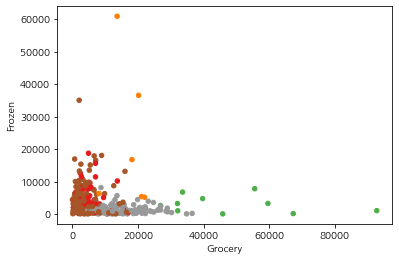

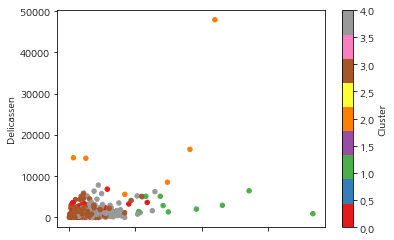

In [4]:
# 그래프로 표현 - 시각화
df.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False, )
df.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True, )
plt.show()
plt.close()

C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\knitwill\anaconda3\lib\site-packages\pandas\plo

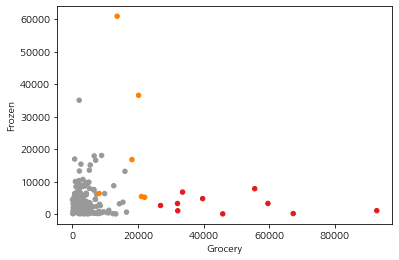

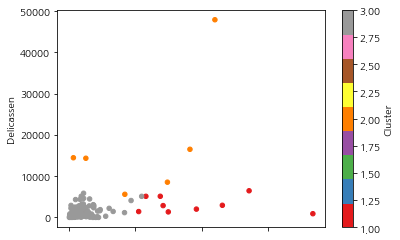

In [5]:
# 큰 값으로 구성된 클러스터(0, 4)를 제외 - 값이 몰려 있는 구간을 자세하게 분석
mask = (df['Cluster'] == 0) | (df['Cluster'] == 4)
ndf = df[~mask]

ndf.plot(kind='scatter', x='Grocery', y='Frozen', c='Cluster', cmap='Set1', 
        colorbar=False,)
ndf.plot(kind='scatter', x='Milk', y='Delicassen', c='Cluster', cmap='Set1', 
        colorbar=True,)
plt.show()
plt.close()

### <b>■ 파이썬으로 서포트 벡터 머신 구현하기</b>
![svm1](http://cfile270.uf.daum.net/image/99995C375F1FCBF026D40E)

    SVM은 이름에서도 알 수 있듯 벡터의 개념을 가져와서 사용
    분류하는 초평면을 찾는 것인데 초평면의 수직 벡터를 normal vector를 찾는다
    
![c&gamma1](http://cfile293.uf.daum.net/image/998A0A495F04F06F0F0850)![c&gamma2](http://cfile275.uf.daum.net/image/99B779445F04F07E0E361C)
    
    면접질문 : SVM의 장점?
        로컬 미니마에 빠지지 않는게 장점
#### 예제. seaborn의 타이타닉 생존자를 예측하는 SVM 모델 구성 코드

In [9]:
# -*- coding: utf-8 -*-

### 기본 라이브러리 불러오기
import pandas as pd
import seaborn as sns
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams.update({'font.size': 22})

df = sns.load_dataset('titanic')

pd.set_option('display.max_columns', 15)

rdf = df.drop(['deck', 'embark_town'], axis=1)  

rdf = rdf.dropna(subset=['age'], how='any', axis=0)  

most_freq = rdf['embarked'].value_counts(dropna=True).idxmax()   
rdf['embarked'].fillna(most_freq, inplace=True)


ndf = rdf[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'embarked']]

onehot_sex = pd.get_dummies(ndf['sex'])
ndf = pd.concat([ndf, onehot_sex], axis=1)

onehot_embarked = pd.get_dummies(ndf['embarked'], prefix='town')
ndf = pd.concat([ndf, onehot_embarked], axis=1)

ndf.drop(['sex', 'embarked'], axis=1, inplace=True)

X=ndf[['pclass', 'age', 'sibsp', 'parch', 'female', 'male', 'town_C', 'town_Q', 'town_S']]  #독립 변수 X
y=ndf['survived']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

from sklearn import svm
# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf',C=20, gamma=0.1) 
"""
적절한 매개변수 C값과 gamma값을 찾는게 중요
C가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생
gamma : 결정 경계의 곡률을 조정하는 매개변수
gamma가 너무 크면 훈련 데이터는 잘 분류하지만 오버피팅이 발생
"""

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])
print('\n')

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[0 0 1 0 0 1 1 0 0 0]
[0 0 1 0 0 1 1 1 0 0]


[[119   6]
 [ 31  59]]


              precision    recall  f1-score   support

           0       0.79      0.95      0.87       125
           1       0.91      0.66      0.76        90

    accuracy                           0.83       215
   macro avg       0.85      0.80      0.81       215
weighted avg       0.84      0.83      0.82       215



### ※ 문제253. 유방암 데이터의 악성 종양과 양성 종양을 분류하는 SVM을 구성하시오

In [7]:
# -*- coding: utf-8 -*-
### 기본 라이브러리 불러오기
import pandas as pd
import numpy as np
# Breast Cancer 데이터셋 가져오기 (출처: UCI ML Repository)
uci_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/\
breast-cancer-wisconsin/breast-cancer-wisconsin.data'

df = pd.read_csv(uci_path, header=None)
df.columns = ['id','clump','cell_size','cell_shape', 'adhesion','epithlial', 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses', 'class'] 
pd.set_option('display.max_columns', 15)

df['bare_nuclei'].replace('?', np.nan, inplace=True) # '?'을 np.nan으로 변경
df.dropna(subset=['bare_nuclei'], axis=0, inplace=True) # 누락데이터 행을 삭제
df['bare_nuclei'] = df['bare_nuclei'].astype('int') # 문자열을 정수형으로 변환

X=df[['clump','cell_size','cell_shape', 'adhesion','epithlial', 'bare_nuclei','chromatin','normal_nucleoli', 'mitoses']] 
y=df['class'] 

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

from sklearn import svm
# 모형 객체 생성 (kernel='rbf' 적용)
svm_model = svm.SVC(kernel='rbf',C=10, gamma=0.05) 

# train data를 가지고 모형 학습
svm_model.fit(X_train, y_train)   

# test data를 가지고 y_hat을 예측 (분류) 
y_hat = svm_model.predict(X_test)

# 모형 성능 평가 - Confusion Matrix 계산
from sklearn import metrics 
svm_matrix = metrics.confusion_matrix(y_test, y_hat)  
print(svm_matrix)
print('\n')

# 모형 성능 평가 - 평가지표 계산
svm_report = metrics.classification_report(y_test, y_hat)            
print(svm_report)

[[128   3]
 [  4  70]]


              precision    recall  f1-score   support

           2       0.97      0.98      0.97       131
           4       0.96      0.95      0.95        74

    accuracy                           0.97       205
   macro avg       0.96      0.96      0.96       205
weighted avg       0.97      0.97      0.97       205



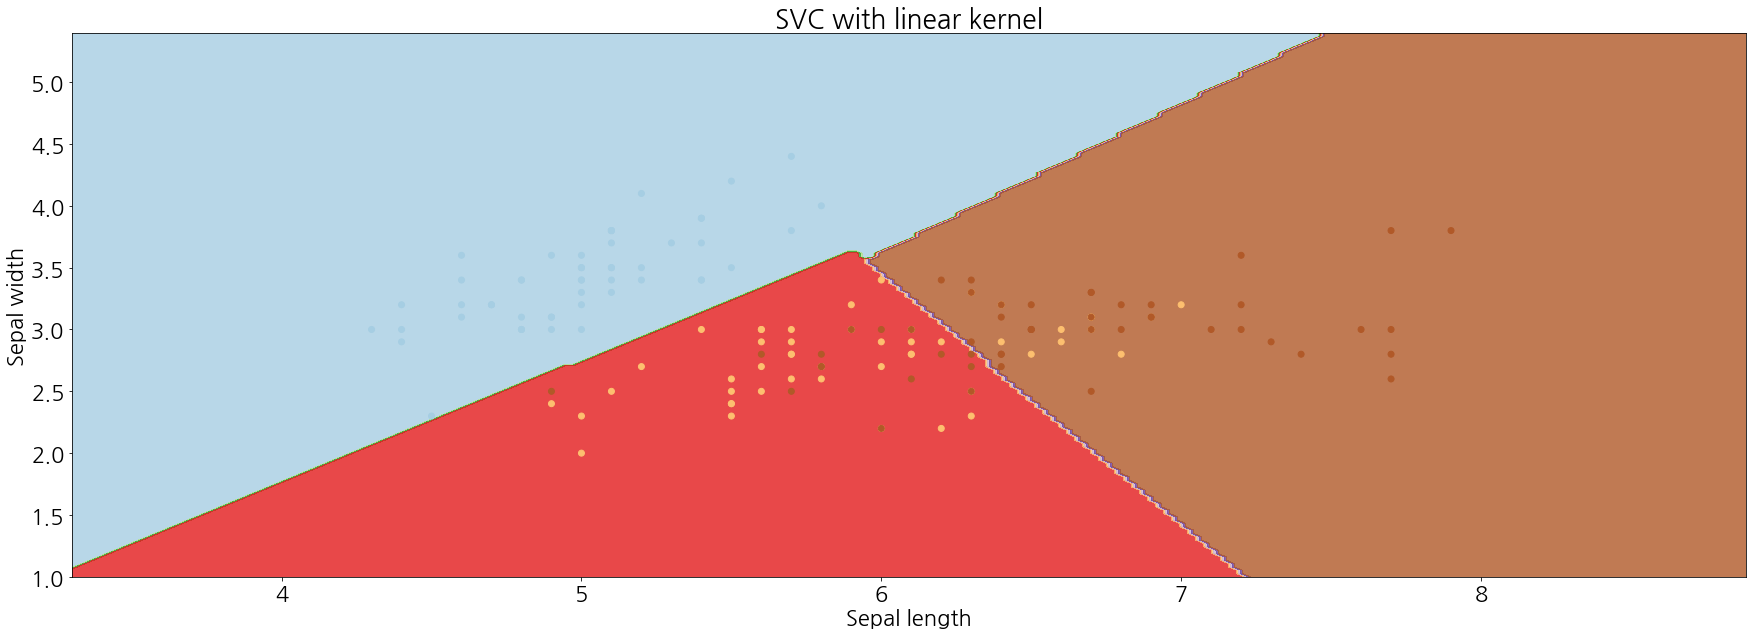

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
# import some data to play with

iris = datasets.load_iris()

X = iris.data[:, :2] # we only take the first two features. We could
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors

C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear', C=1, gamma=1).fit(X, y) # C 테스트

#svc = svm.SVC(kernel='rbf', C=1, gamma=1).fit(X, y)  # 감마 테스트
# create a mesh to plot in

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

### ※ 문제254. Kaggle 순위를 캡처해서 댓글을 작성하시오 (일요일 밤까지)
    파이썬 머신러닝_NCS_노트정리_문제253번_김서준.pdf